In [17]:
import os, networkx as nx, pandas as pd

os.chdir('/Users/[editted]/Desktop/compSoc/datasets/MA_cbg_human_mobility_2019')
ma_df = pd.read_csv('MA_cbg2cbg_2019_01.csv')
ma_df
G = nx.Graph()

for i in range(len(ma_df)):
    origin_cbg = ma_df.loc[i, 'poi_cbg']
    destination_cbg = ma_df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = ma_df.loc[i, 'raw_device_counts']
    num_visitor = ma_df.loc[i, 'visitor_count']
    pct_visitor = num_visitor / total_residents_in_origin
    G.add_edge(origin_cbg, destination_cbg, weight=pct_visitor)

print(G) #40292 nodes, 742299 edges
    

Graph with 40292 nodes and 742299 edges


In [48]:
import os, networkx as nx, pandas as pd

os.chdir('/Users/liamdietrich/Desktop/compSoc/datasets/MA_cbg_human_mobility_2019')
ma_df = pd.read_csv('MA_cbg2cbg_2019_01.csv')
ma_df
G = nx.Graph()

for i in range(len(ma_df)):
    origin_cbg = ma_df.loc[i, 'poi_cbg']
    destination_cbg = ma_df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = ma_df.loc[i, 'raw_device_counts']
    num_visitor = ma_df.loc[i, 'visitor_count']
    pct_visitor = num_visitor / total_residents_in_origin
    G.add_edge(origin_cbg, destination_cbg, weight=pct_visitor)

li = []

for i in G:
    li.append([i, G.degree(i), G.degree(i, weight = 'weight')])

G_df = pd.DataFrame(li)
G_df.rename(columns = {0: "node", 1: "unweighted degree", 2: "weighted degree"}, inplace = True)

G_df

,node,unweighted degree,weighted degree
0,250250303003,2936,1.617298
1,250251010016,609,1.829781
2,440070008003,77,0.201907
3,250250923002,600,2.675362
4,250173686001,3217,1.763752
...,...,...,...
40287,170318261003,1,0.000726
40288,120310144111,1,0.000726
40289,530330294073,1,0.000726
40290,360610165001,1,0.000726


AxesSubplot(0.125,0.125;0.775x0.755)


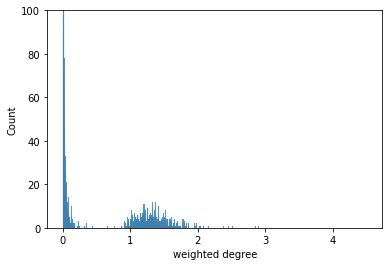

In [47]:
import os, networkx as nx, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

os.chdir('/Users/liamdietrich/Desktop/compSoc/datasets/MA_cbg_human_mobility_2019')
ma_df = pd.read_csv('MA_cbg2cbg_2019_01.csv')
ma_df
G = nx.Graph()

for i in range(len(ma_df)):
    origin_cbg = ma_df.loc[i, 'poi_cbg']
    destination_cbg = ma_df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = ma_df.loc[i, 'raw_device_counts']
    num_visitor = ma_df.loc[i, 'visitor_count']
    pct_visitor = num_visitor / total_residents_in_origin
    G.add_edge(origin_cbg, destination_cbg, weight=pct_visitor)

li = []

for i in G:
    li.append([i, G.degree(i), G.degree(i, weight = 'weight')]) 
G_df = pd.DataFrame(li)
G_df.rename(columns = {0: "node", 1: "unweighted degree", 2: "weighted degree"}, inplace = True)

sns.histplot(data=G_df['weighted degree'])
plt.ylim(0, 100)
plt.show() #degrees do not follow the power law, because as k increases from 0.5 to 1.5, 
           #the frequency of the nodes with that degree also increases
